# STATISTICS - e-learning market

we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [81]:
import pandas as pd

In [82]:
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=0)
pd.options.display.max_columns = 140
print(survey.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN      

In [83]:
survey.shape

(18175, 136)

In [84]:
survey["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                                                                                  

There are people interested in multiple subjects. So we cannot use the frequency distribution table per student. Instead, we are going to find out the number of students interested in just one subject, and how many people interested in at least web or mobile development.

In [85]:
survey["JobRoleInterest"].dropna()

1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
6                                 Full-Stack Web Developer
9        Full-Stack Web Developer,   Quality Assurance ...
11         DevOps / SysAdmin,   Data Scientist, Informa...
13       Back-End Web Developer, Full-Stack Web Develop...
14                                Full-Stack Web Developer
15                                Full-Stack Web Developer
16                                Full-Stack Web Developer
18       Full-Stack Web Developer,   Front-End Web Deve...
19         Front-End Web Developer,   Mobile Developer,...
21                                    Information Security
22                                Full-Stack Web Developer
23                                  Back-End Web Developer
28                                Full-Stack Web Develop

In [86]:
nonullinterest = survey["JobRoleInterest"].dropna()
nonullinterest.str.split(pat=",").apply(lambda x: len(x)).value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

There are about 31% of students who are interested in just one subject.

True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64


([<matplotlib.axis.XTick at 0x7feff1821e80>,
 <a list of 2 Text xticklabel objects>)

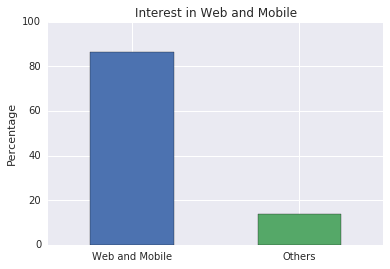

In [87]:
print(nonullinterest.str.contains("Web|Mobile").value_counts(normalize=True)*100)

import matplotlib.pyplot as plt
%matplotlib inline
(nonullinterest.str.contains("Web|Mobile").value_counts(normalize=True)*100).plot.bar()
plt.title("Interest in Web and Mobile")
plt.ylim(0,100)
plt.ylabel("Percentage")
plt.xticks([0,1],["Web and Mobile","Others"],rotation=0)

86.3% students have interest in at least one of Web or Mobile development.

In [88]:
surveyinterest = survey.dropna(subset=["JobRoleInterest"])
surveyinterest["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [89]:
surveyinterest["CountryLive"].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

45% of interested people are living in United States of America. Followed up by India, far below USA at 7.7%, UK at 4.6%.
Its best to find out next the spending power of these potential customers.

In [90]:
topcountriesinterest = surveyinterest[(surveyinterest.CountryLive == "United States of America")
              | (surveyinterest.CountryLive == "India")
              | (surveyinterest.CountryLive == "United Kingdom")
              | (surveyinterest.CountryLive == "Canada")].copy()

In [91]:
topcountriesinterest["SpendPerMonth"] = topcountriesinterest["MoneyForLearning"] / topcountriesinterest["MonthsProgramming"].replace(0.0,1.0)
topcountriesinterest = topcountriesinterest.dropna(subset=["CountryLive","SpendPerMonth"])
topcountriesinterest.groupby("CountryLive").mean()["SpendPerMonth"].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: SpendPerMonth, dtype: float64

It is surprising to find that countries with higher GDP per capita like UK and Canada has a lower spending India. The data might be innacurate. India's spending data might be too high, or UK and Canada too low.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7feff17d9f60>,
 <a list of 4 Text xticklabel objects>)

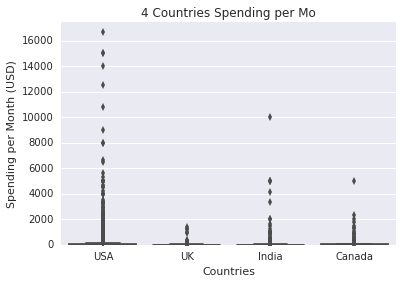

In [92]:
import seaborn as sns
sns.boxplot(x="CountryLive", y="SpendPerMonth", data=topcountriesinterest)
plt.ylim(0,17500)
plt.title("4 Countries Spending per Mo")
plt.ylabel("Spending per Month (USD)")
plt.xlabel("Countries")
plt.xticks(range(4), ["USA","UK","India","Canada"])

In [93]:
#Remove USA respondents who spends more than 6000 USD per month and either didn't attend bootcamp or has have less than 3 months programming experience.
usoutlier = topcountriesinterest[(topcountriesinterest.CountryLive == "United States of America")
& (topcountriesinterest.SpendPerMonth >= 6000)
& ((topcountriesinterest.AttendedBootcamp == 0)
   | (topcountriesinterest.MonthsProgramming <= 3))]

topcountriesinterest.drop(usoutlier.index, inplace=True)

In [95]:
#Remove India respondents who spends more than 2500 USD per month
indiaoutlier = topcountriesinterest[(topcountriesinterest.SpendPerMonth >= 2500)
                                   & (topcountriesinterest.CountryLive == "India")]

topcountriesinterest.drop(indiaoutlier.index, inplace=True)

In [99]:
#Remove Canada respondents who spends more than 4500 USD per month
canadaoutlier = topcountriesinterest[(topcountriesinterest.CountryLive == "Canada")
                                    & (topcountriesinterest.SpendPerMonth >= 4500)]

topcountriesinterest.drop(canadaoutlier.index, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: SpendPerMonth, dtype: float64


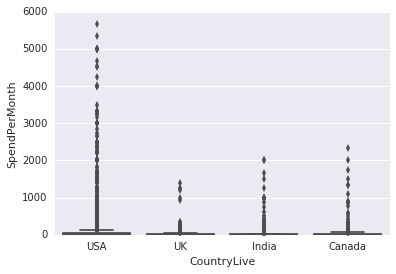

In [106]:
sns.boxplot(x="CountryLive", y="SpendPerMonth",data=topcountriesinterest)
plt.xticks(range(4), ["USA","UK","India","Canada"])
print(topcountriesinterest.groupby("CountryLive").mean()["SpendPerMonth"])

After removing the outliers, the two best countries to choose for advertisement are USA followed by Canada.

In [108]:
topcountriesinterest.CountryLive.value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Even though Canada has higher mean spending per month than India, India has a larger number of potential customers.
India's spending per month is also above the price of our program.

USA is definitely a market to advertise in.
But whether to advertise in India and Canada, or just either one of them, and at whatever budget allocation, is a decision to be made by the marketing team in our company.

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.